# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Import dataset

In [2]:
df = pd.read_csv('C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

## Check data imbalance

In [3]:
print('Number of unique values present to identify diabetes')
print(df['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Data split

In [5]:
dfs = {}  # Dictionary to hold DataFrames

for i in range(3):
    dfs[f'df_{i}'] = df[df['Diabetes_012'] == i]

In [6]:
from sklearn.model_selection import train_test_split
train_df_0, test_df_0 = train_test_split(dfs['df_0'], test_size=0.2)
train_df_1, test_df_1 = train_test_split(dfs['df_1'], test_size=0.2)
train_df_2, test_df_2 = train_test_split(dfs['df_2'], test_size=0.2)

In [7]:
train_combined = pd.concat([train_df_0, train_df_1, train_df_2], ignore_index=True)
test_combined = pd.concat([test_df_0, test_df_1, test_df_2], ignore_index=True)

In [8]:
print(train_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64


In [9]:
print(test_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    42741
2.0     7070
1.0      927
Name: count, dtype: int64


# Smote oversampling

In [11]:
from imblearn.over_sampling import SMOTE
target_variable = 'Diabetes_012'


class_distribution = train_combined[target_variable].value_counts()
print("Class Distribution:")
print(class_distribution)



X = train_combined.drop(columns=[target_variable])
y = train_combined[target_variable]

desired_samples = {0: 170962, 1: 170962, 2: 170962}
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_variable])], axis=1)

print("Oversampled Class Distribution:")
print(df_oversampled[target_variable].value_counts())

Class Distribution:
Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64
Oversampled Class Distribution:
Diabetes_012
0.0    170962
1.0    170962
2.0    170962
Name: count, dtype: int64


# Decision Tree

In [12]:

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=0)

# Predict test result

In [13]:
X_test = test_combined.drop(columns=[target_variable])
y_test = test_combined[target_variable]

In [14]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

[[36518   921  5302]
 [  643    40   244]
 [ 4556   275  2239]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     42741
         1.0       0.03      0.04      0.04       927
         2.0       0.29      0.32      0.30      7070

    accuracy                           0.76     50738
   macro avg       0.40      0.40      0.40     50738
weighted avg       0.78      0.76      0.77     50738



# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

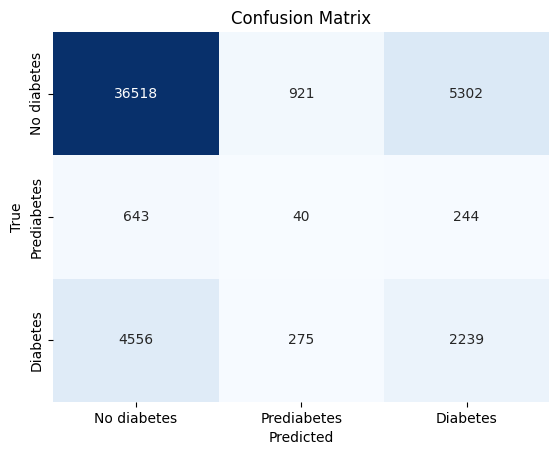

In [16]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

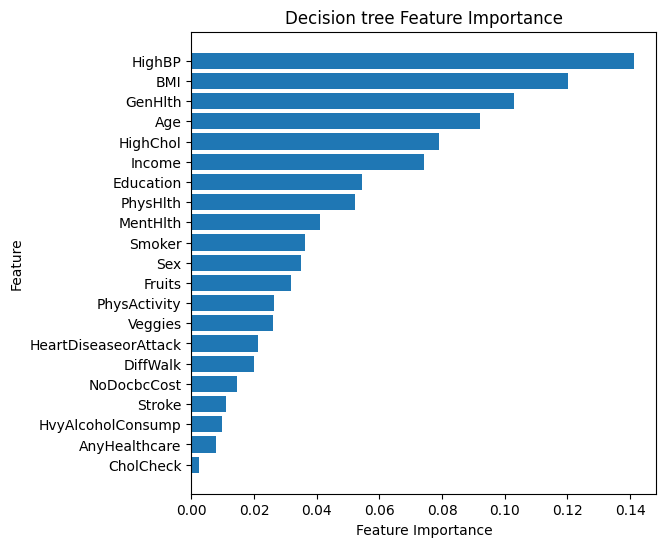

In [18]:
feature_importances = classifier.feature_importances_
feature_names = list(X.columns)
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision tree Feature Importance')
plt.show()